[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/metoranoia/SARIMA-Forecasting/blob/test-branch/test.ipynb)

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/tori/OneDrive - Universitas Airlangga/Dokumen/Project (Portofolio)/SARIMA Forecasting/retail_sales_household_appliance_stores_FRED.csv")
df.head()

,DATE,SM443141USN
0,1/1/2010,1112
1,2/1/2010,1130
2,3/1/2010,1223
3,4/1/2010,1245
4,5/1/2010,1365


In [32]:
X = df['DATE']
y = df['SM443141USN']
#splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

Figure(640x480)
Figure(640x480)
ADF Statistic: -2.382126684722275
p-value: 0.1468446930030317
Critical Values:
   1%: -3.4901313156261384
   5%: -2.8877122815688776
   10%: -2.5807296460459184


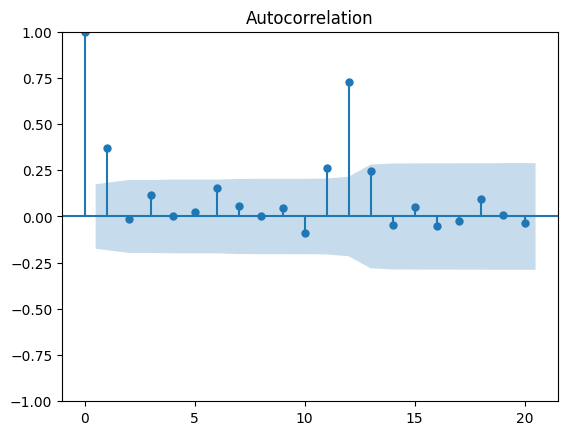

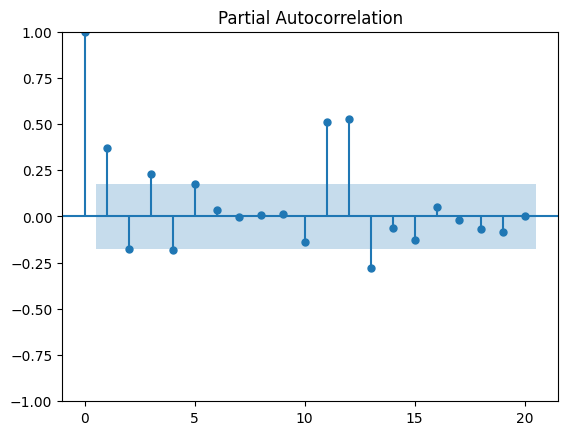

In [97]:
#Plot ACF and PACF
print(plot_acf(y_train, lags=20))
print(plot_pacf(y_train, lags=20))
def adf(x):
    result = adfuller(x)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
adf(y_train)

Figure(640x480)
Figure(640x480)
ADF Statistic: -4.1031768040354315
p-value: 0.0009568801606268401
Critical Values:
   1%: -3.4901313156261384
   5%: -2.8877122815688776
   10%: -2.5807296460459184


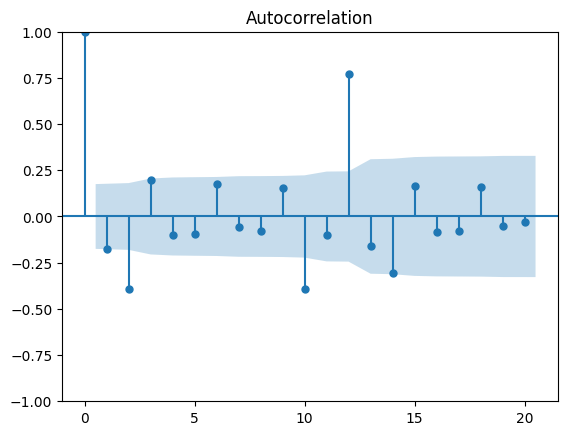

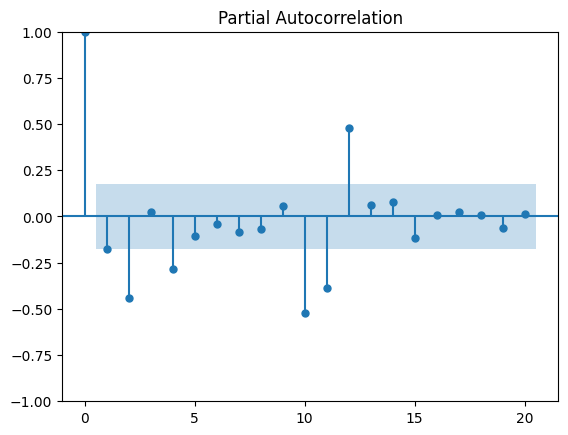

In [99]:
#diff = 1
diff_1 = np.diff(y_train,1)
print(plot_acf(diff_1, lags=20))
print(plot_pacf(diff_1, lags=20))
adf(diff_1)

Figure(640x480)
Figure(640x480)
ADF Statistic: -14.256996281812006
p-value: 1.4482441249595906e-26
Critical Values:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097


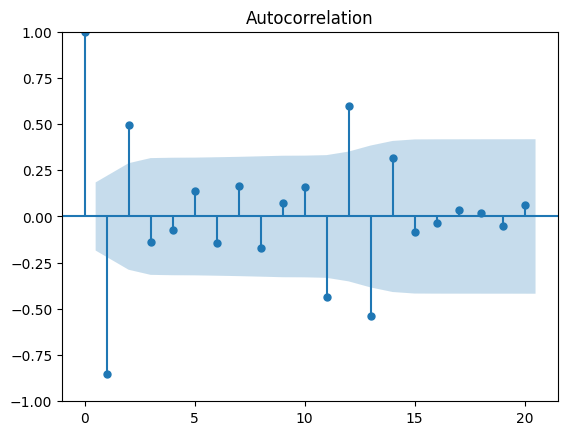

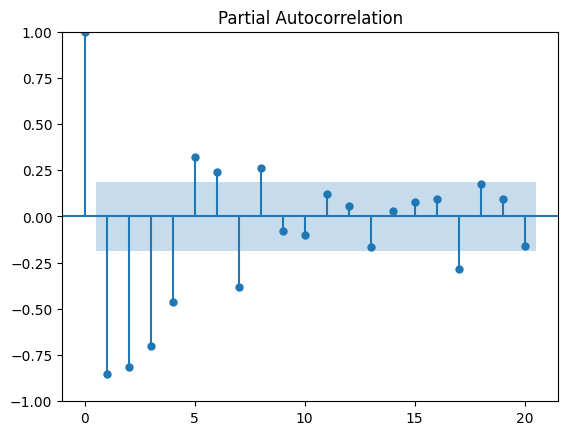

In [104]:
#diff = 12
diff_12 = np.diff(diff_1,12)
print(plot_acf(diff_12, lags=20))
print(plot_pacf(diff_12, lags=20))
adf(diff_12)

In [121]:
order = (2, 1, 0)
seasonal_order = (0, 1, 1, 12)
model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          SM443141USN   No. Observations:                  126
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -629.410
Date:                              Sat, 05 Aug 2023   AIC                           1266.820
Time:                                      22:49:20   BIC                           1277.729
Sample:                                           0   HQIC                          1271.247
                                              - 126                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5341      0.106     -5.019      0.000      -0.743      -0.326
ar.L2         -0.3526      0.132     -2.678      0.007      -0.611      -0.095
ma.S.L12      -0.5201      0.135     -3.848      0.000      -0.785      -0.255
sigma2      3889.2956    506.932      7.672      0.000    2895.728    4882.864
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               128.97
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Statistic: 14.226
15.000: 0.559, data does not look normal (reject H0)
10.000: 0.637, data does not look normal (reject H0)
5.000: 0.764, data does not look normal (reject H0)
2.500: 0.891, data does not look normal (reject H0)
1.000: 1.060, data does not look normal (reject H0)
p-value: 14.226


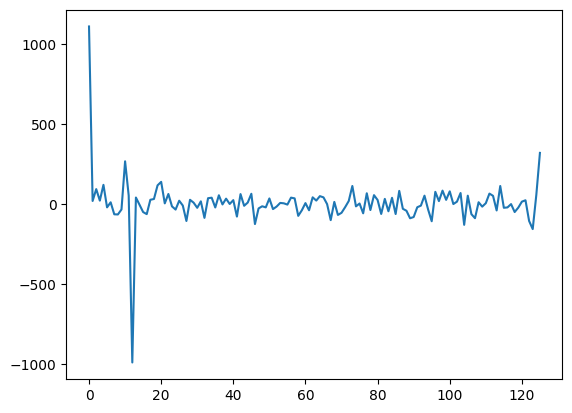

In [129]:
#library normality test
from scipy.stats import anderson
residual = model_fit.resid
residual.plot()
result = anderson(residual)
# find p-value
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


In [118]:
#forecast and count mape y_test and y_pred
y_pred = model_fit.forecast(steps=len(y_test))
#count mape
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
mape

16.563744225292794

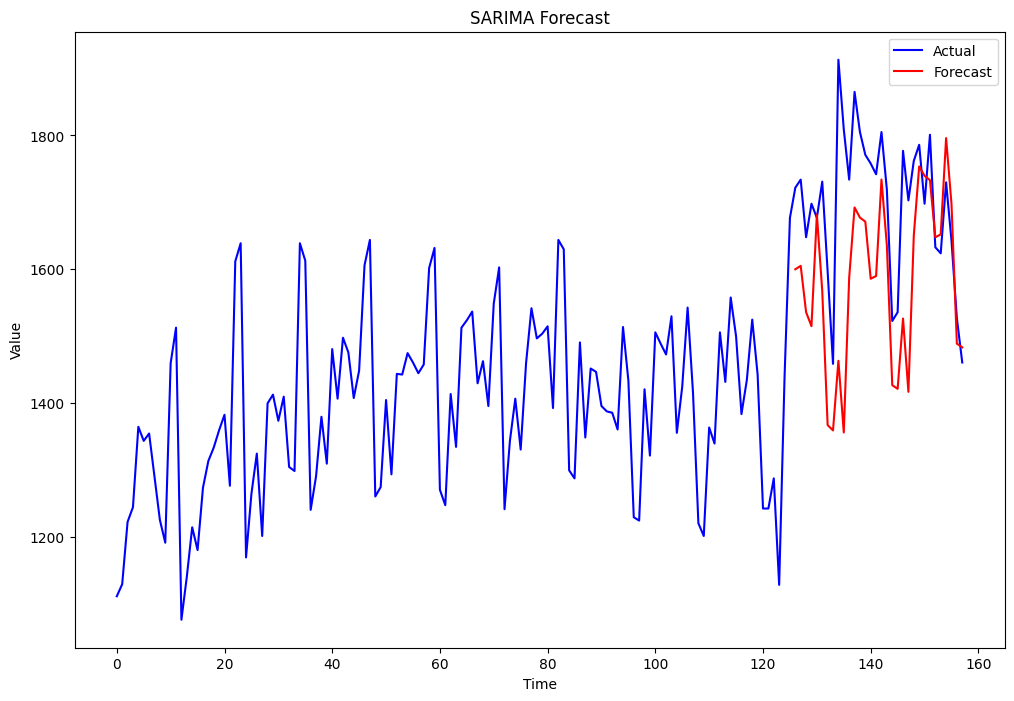

In [103]:
# Plot original data and forecast
time_index = range(len(y_train), len(y_train) + len(y_test))  # Extend time index for forecasted data
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(range(len(df.SM443141USN)), df.SM443141USN, color='blue')  # Plot the original data
plt.plot(time_index, y_pred, color='red')  # Plot the forecasted data with the extended time index
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Actual', 'Forecast'])
# Show plot
plt.show()